In [1]:
# Program to analyze the Pharmaceutical data to draw visualizations in Python using matplotlib
# Import the dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
%matplotlib inline

In [2]:
# Import the data files and create data frames
clinical_data_df = pd.read_csv("data/clinicaltrial_data.csv")
drug_data_df = pd.read_csv("data/mouse_drug_data.csv")

clinical_data_df.head()
# drug_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Perform analysis on the clinical data frame and cleansing 
clinical_data_df.shape
clinical_data_df.describe()
clinical_data_df.nunique()
clinical_data_df.count()
clinical_data_df.isnull().sum()
clinical_data_df['Timepoint'].value_counts()
clinical_data_df['Timepoint'].unique()
clinical_data_df['Mouse ID'].value_counts()
clinical_data_df.groupby('Mouse ID')['Mouse ID'].value_counts().sort_values(ascending=False)
clinical_data_df.loc[clinical_data_df['Mouse ID'] == 'g989']

clinical_data_df['Metastatic Sites'].value_counts()
clinical_data_df.drop_duplicates().count()
clinical_data_df.duplicated()
clinical_data_df.loc[clinical_data_df.duplicated()]
clinical_data_df.loc[clinical_data_df['Mouse ID'] == 'g989']
cleaned_clinical_df = clinical_data_df.drop_duplicates()
cleaned_clinical_df.loc[clinical_data_df['Mouse ID'] == 'g989']
cleaned_clinical_df.count()
cleaned_clinical_df.nunique()


Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [4]:
# Perform analysis on the drug data frame and cleansing 

drug_data_df.shape
drug_data_df.count()
drug_data_df.describe()
drug_data_df.nunique()
drug_data_df.isnull().sum()
drug_data_df.loc[drug_data_df.duplicated()]
drug_data_df.describe()
drug_data_df['Drug'].value_counts().sum()

250

In [5]:
# Time to merge

animal_study_df = pd.merge(cleaned_clinical_df, drug_data_df, on='Mouse ID', how='left', sort=True)
animal_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,a203,0,45.000000,0,Infubinol
1,a203,5,48.508468,0,Infubinol
2,a203,10,51.852437,1,Infubinol
3,a203,15,52.777870,1,Infubinol
4,a203,20,55.173336,1,Infubinol


In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = animal_study_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
drug_response_df = pd.DataFrame(tumor_mean)
drug_response_df.reset_index(inplace=True)

# Preview DataFrame
drug_response_df.head(11)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_errors = animal_study_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
standard_errors_df = pd.DataFrame(standard_errors)
standard_errors_df.reset_index(inplace=True)

# Preview DataFrame
standard_errors_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
drug_response_df_p = drug_response_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

standard_errors_df_p = standard_errors_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
drug_response_df_p.head()
standard_errors_df_p.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


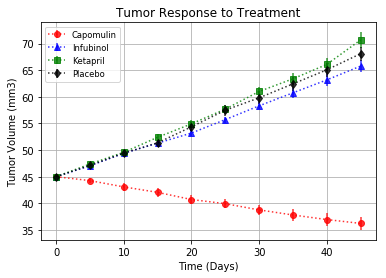

In [9]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

x_axis = drug_response_df_p.index
ax.errorbar(x_axis, drug_response_df_p['Capomulin'], standard_errors_df_p['Capomulin'], fmt='ro:', alpha=0.8)
ax.errorbar(x_axis, drug_response_df_p['Infubinol'], standard_errors_df_p['Infubinol'], fmt='b^:', alpha=0.8)
ax.errorbar(x_axis, drug_response_df_p['Ketapril'], standard_errors_df_p['Ketapril'], fmt='gs:', alpha=0.8)
ax.errorbar(x_axis, drug_response_df_p['Placebo'], standard_errors_df_p['Placebo'], fmt='kd:', alpha=0.8)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
ax.grid()
ax.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("graphs/Tumor Response to Treatment.png")


In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean = animal_study_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
drug_response_df = pd.DataFrame(metastatic_mean)
drug_response_df.reset_index(inplace=True)

# Preview DataFrame
drug_response_df.head(10)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_errors = animal_study_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
standard_errors_df = pd.DataFrame(standard_errors)
standard_errors_df.reset_index(inplace=True)

# Preview DataFrame
standard_errors_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [12]:
# Minor Data Munging to Re-Format the Data Frames
drug_response_df_p = drug_response_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

standard_errors_df_p = standard_errors_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
drug_response_df_p.head()
standard_errors_df_p.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


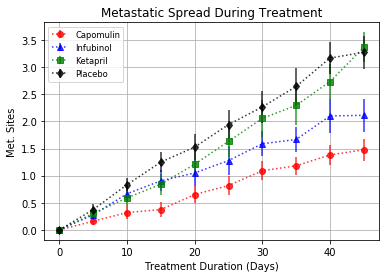

In [13]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

x_axis = drug_response_df_p.index
ax.errorbar(x_axis, drug_response_df_p['Capomulin'], standard_errors_df_p['Capomulin'], fmt='ro:', alpha=0.8)
ax.errorbar(x_axis, drug_response_df_p['Infubinol'], standard_errors_df_p['Infubinol'], fmt='b^:', alpha=0.8)
ax.errorbar(x_axis, drug_response_df_p['Ketapril'], standard_errors_df_p['Ketapril'], fmt='gs:', alpha=0.8)
ax.errorbar(x_axis, drug_response_df_p['Placebo'], standard_errors_df_p['Placebo'], fmt='kd:', alpha=0.8)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title("Metastatic Spread During Treatment")
ax.grid()
ax.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("graphs/Metastatic Spread During Treatment.png")

# Show the Figure
plt.show()


In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = animal_study_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
mouse_max = animal_study_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count().max()

# Convert to DataFrame
drug_response_df = pd.DataFrame({'Mouse Count': mouse_count})
drug_response_df.reset_index(inplace=True)

drug_response_p_df = pd.DataFrame({'Mouse Percent': (mouse_count/mouse_max)*100})
drug_response_p_df.reset_index(inplace=True)

# Preview DataFrame
drug_response_df.head()
drug_response_p_df.head()


,Drug,Timepoint,Mouse Percent
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0
3,Capomulin,15,96.0
4,Capomulin,20,92.0


In [15]:
# Minor Data Munging to Re-Format the Data Frames
drug_response_df_piv = drug_response_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
drug_response_p_df_piv = drug_response_p_df.pivot(index='Timepoint', columns='Drug', values='Mouse Percent')

# Preview that Reformatting worked
drug_response_p_df_piv.head()
drug_response_df_piv.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


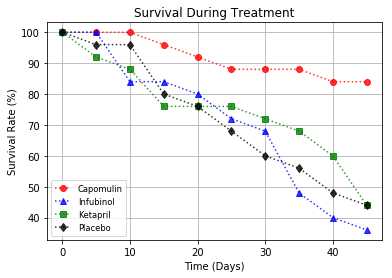

In [16]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()

#enter the percentages.. that's the missing part

x_axis = drug_response_df_p.index
ax.errorbar(x_axis, drug_response_p_df_piv['Capomulin'], fmt='ro:', alpha=0.8)
ax.errorbar(x_axis, drug_response_p_df_piv['Infubinol'], fmt='b^:', alpha=0.8)
ax.errorbar(x_axis, drug_response_p_df_piv['Ketapril'], fmt='gs:', alpha=0.8)
ax.errorbar(x_axis, drug_response_p_df_piv['Placebo'], fmt='kd:', alpha=0.8)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival During Treatment")
ax.grid()
ax.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("graphs/Survival During Treatment.png")

# Show the Figure
plt.show()

In [17]:
# Calculate the percent changes for each drug
mean_tumor = animal_study_df.groupby(['Drug', 'Timepoint']).agg({'Tumor Volume (mm3)': 'mean'})

percent_change = (mean_tumor.groupby('Drug').agg({'Tumor Volume (mm3)': 'last'}) 
                  - mean_tumor.groupby('Drug').agg({'Tumor Volume (mm3)': 'first'}))/mean_tumor.groupby('Drug').agg({'Tumor Volume (mm3)': 'first'})*100


# # Display the data to confirm
percent_change

,Tumor Volume (mm3)
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


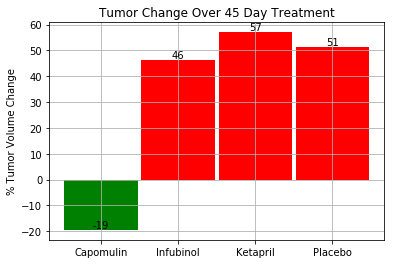

In [18]:
# Store all Relevant Percent Changes into a Tuple
percentage_changes = ()
percentage_changes = percent_change["Tumor Volume (mm3)"]
percentage_changes

# Slice the data between passing and failing drugs

drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
drug_response = percentage_changes.loc[drugs]
drug_response

# Orient widths. Add labels, tick marks, etc. 
colors = ['r' if x > 0 else 'g' for x in drug_response]

fig, ax = plt.subplots()

rects = ax.bar(drug_response.index, drug_response, 0.95, color=colors)
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.grid()

# Use functions to label the percentages of changes
def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(rects)

# Save the Figure
plt.savefig("graphs/Tumor Change Over 45 Day Treatment.png")

# Show the Figure
plt.show()

In [ ]:
# # Summary 
# 1. For the 4 drugs in consideration (Capomulin, Infubinol, Ketapril, Placebo) only Capomulin has proven to reduce
# the Tumor volume over the range of 45 days. All others 3 drugs have proven to be ineffective. 
# 2. Infobinol has had the lowest survival rate of the mice compared to the other 3 drugs. 
# 3. Metastatic site spread was the higest for the Ketapril drug 